In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import re
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

def preprocess(sentence):
    return [w for w in sentence.lower().split() if w not in stop_words]

def process(text):
    text = re.sub(r'[\,\./;()"-\[\]]'," ",text)
    text = preprocess(text)
    text.sort()
    return(" ".join(text))

In [3]:
data = pd.read_table("data\\imdb-title-cast-rating-desc.tsv")
data = data[["title","genre","cast","rating","description"]].dropna()

In [4]:
# data['genre'] = data['genre'].map(lambda x : x.lower().replace(','," ").split())
# data['cast'] = data['cast'].map(lambda x : x.lower().split()[:5])
# data['description'] = data['description'].map(lambda x : process(x))

In [5]:
data['genre'] = data['genre'].map(lambda x : " ".join(sorted(x.lower().replace(','," ").split())))
data['cast'] = data['cast'].map(lambda x : " ".join(sorted(x.lower().replace("nm"," ").split()[:5])))
data['description'] = data['description'].map(lambda x : process(x))
data['desc_set'] = data["description"].map(lambda x: " ".join(set(x.lower().split())))

In [6]:
data

,title,genre,cast,rating,description,desc_set
0,The Green Archer,action adventure crime,0186608 0279963 0345300 0430460 0580585,6.6,accompanied action adaptation agle ahead aleri...,action orothy ames usual brother director owet...
1,The German Weekly Review,documentary news,0324305 0351425 0381523 0386944 2233358,7.7,alerno aptain apture bruzzi eachhead eavy eek ...,ome llied erman ith aptain ighting alerno aptu...
2,Americana,family game-show,0175091 0202565 0272126 0304443 0564535,3.0,ach aired artin ason critic ecember elevision ...,artin sponsored weekly ran originally critic s...
3,Kraft Theatre,drama,0181961 0379051 0550855 0572844 0853299,8.4,adaptations added addition advertising agency ...,adaptations created plays evenings airing ran ...
5,Actor's Studio,drama,0175091 0291507 0358449 0384696 1169111,7.1,actors adapted aired alsam alternating ames an...,oone ames authors ill produced alsam hosted in...
...,...,...,...,...,...,...
70953,History Erased,documentary,10276784 11776042 4953926 6177643 8943457,6.6,accomplishments alternate amous away celebrate...,world’s peeled fascinating timeline – stories ...
70956,Blown Away,reality-tv,11261411 11261413 4509752 4903469 5998859,7.1,artists challenges champion chance en glassblo...,title prizes heat win chance artists master en...
70957,Race Across the World,documentary game-show,11551611 11551612 11551631 11551632 11551633,8.3,airs ar ast flight race reach sight single sma...,flight airs race reach taking ar smartphone wi...
70967,Zalim Istanbul,drama,0476334 1728957 7487579 8823972 9619191,5.7,agreed aracay aracay arrival become becoming b...,married arrival get love town become manage eh...


In [7]:
data["genre"].astype("category").cat.codes

0          7
1        596
2        699
3        612
5        612
        ... 
70953    556
70956    827
70957    572
70967    612
70973    612
Length: 27308, dtype: int16

In [8]:

dd = data.copy()


In [9]:
dd = dd.apply(lambda x: x.astype("category").cat.codes)
dd["rating"] = data["rating"]
dd

,title,genre,cast,rating,description,desc_set
0,21428,7,10890,6.6,3006,300
1,21289,596,13574,7.7,15511,17431
2,1269,699,10598,3.0,3903,2595
3,11353,612,10772,8.4,7642,398
5,681,612,10599,7.1,6770,18138
...,...,...,...,...,...,...
70953,9206,556,20113,6.6,3121,26867
70956,2879,827,21621,7.1,21572,24264
70957,16637,572,21962,8.3,14680,9678
70967,26052,612,16132,5.7,11638,14477


In [10]:
cm = dd.corr()

<AxesSubplot:>

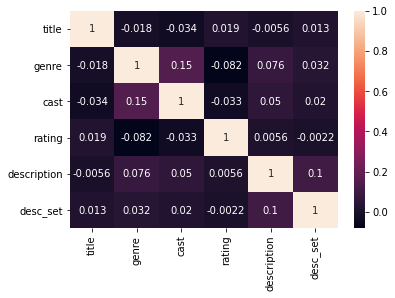

In [11]:
sns.heatmap(cm,annot=True)

In [12]:
sorted_mat = cm.unstack().sort_values(ascending=False)
print(sorted_mat)

title        title          1.000000
genre        genre          1.000000
description  description    1.000000
rating       rating         1.000000
cast         cast           1.000000
desc_set     desc_set       1.000000
genre        cast           0.147246
cast         genre          0.147246
desc_set     description    0.101974
description  desc_set       0.101974
             genre          0.075816
genre        description    0.075816
cast         description    0.050346
description  cast           0.050346
genre        desc_set       0.031782
desc_set     genre          0.031782
             cast           0.019715
cast         desc_set       0.019715
title        rating         0.018993
rating       title          0.018993
title        desc_set       0.012877
desc_set     title          0.012877
rating       description    0.005621
description  rating         0.005621
rating       desc_set      -0.002163
desc_set     rating        -0.002163
description  title         -0.005636
t